In [0]:
! pip install -q tensorflow==2.0.0.alpha0
import tensorflow as tf
print(tf.__version__)
import numpy as np

    100% |████████████████████████████████| 79.9MB 377kB/s 
    100% |████████████████████████████████| 61kB 22.6MB/s 
    100% |████████████████████████████████| 419kB 17.0MB/s 
    100% |████████████████████████████████| 3.0MB 10.5MB/s 
2.0.0-alpha0


In [0]:
num_exp, training_steps, learning_rate, disp = 1000, 1000, 0.001, 100
m, c = 6, -5

In [0]:
# This is the initialization of the variables
def train_data(n, m, c):
    x = tf.random.normal([n])
    noise = tf.random.normal([n])
    y = m*x + c + noise
    return x, y

# Forward propagation result
def prediction(x, weight, bias):
    return weight*x + bias

In [0]:
# Loss function
def loss(x, weight, bias, y):
    error = prediction(x, weight, bias) - y
    sq_error = tf.square(error)
    return tf.reduce_mean(input_tensor=sq_error)

In [0]:
# Calculates and returns the gradient using tf.GradientTape()
def grad(x, weight, bias, y):
    with tf.GradientTape() as tape:
        loss_ = loss(x, weight, bias, y)
    return tape.gradient(loss_, [weight, bias])

Text(0.5, 1.0, 'Initialization')

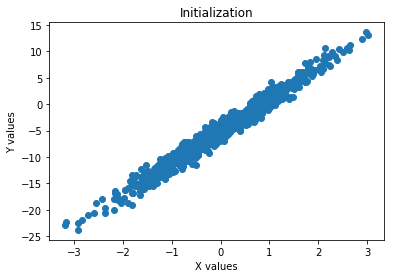

In [0]:
# Visualize the initial results
import matplotlib.pyplot as plt

x, y = train_data(num_exp, m, c)
plt.scatter(x, y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Initialization')

In [0]:
W = tf.Variable(np.random.randn())
B = tf.Variable(np.random.randn())

print(f'Initial loss is {loss(x, W, B, y)}')

Initial loss is 92.91170501708984


In [0]:
# Gradient descent

for i in range(training_steps):
    d_weight, d_bias = grad(x, W, B, y)
    
    dW = d_weight * learning_rate
    dB = d_bias * learning_rate
    
    W.assign_sub(dW)
    B.assign_sub(dB)
    
    if i == 0 or i % disp == 0:
        print(f'Loss after iteration {i}: {loss(x, W, B, y)}')
              

Loss after iteration 0: 92.54463195800781
Loss after iteration 100: 62.356605529785156
Loss after iteration 200: 42.12836837768555
Loss after iteration 300: 28.573917388916016
Loss after iteration 400: 19.49140167236328
Loss after iteration 500: 13.405441284179688
Loss after iteration 600: 9.327383041381836
Loss after iteration 700: 6.594789028167725
Loss after iteration 800: 4.763733386993408
Loss after iteration 900: 3.5367891788482666


In [0]:
print(f'W: {W.numpy()} and B: {B.numpy()}')

W: 4.951493740081787 and B: -4.273871898651123


Text(0.5, 1.0, 'Final result')

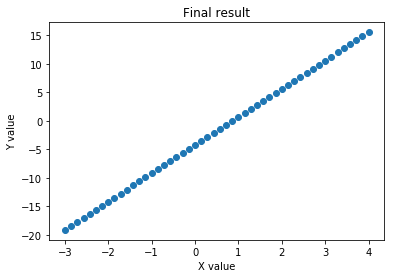

In [0]:
x1 = np.linspace(-3, 4, 50)
y1 = W.numpy()*x1 + B.numpy()

plt.scatter(x1, y1)
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title('Final result')

## Boston Housing Prices Prediction

In [0]:
! pip install -q tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
print(tf.__version__)
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston

    100% |████████████████████████████████| 332.1MB 55kB/s 
2.0.0-alpha0


In [0]:
train = 300
val = 100

features, prices = load_boston(True)

test = len(features) - train - val

train_features = tf.cast(scale(features[:train]), tf.float32)
train_prices = prices[:train]

val_features = tf.cast(scale(features[train:train+val]), tf.float32)
val_prices = prices[train:train+val]

test_features = tf.cast(scale(features[val+train:train+val+test]), tf.float32)
test_prices = prices[val+train:train+val+test]

In [0]:
def loss(x, y, weights, bias):
    error = tf.subtract(prediction(x, weights, bias), y)
    sq_error = tf.square(error)
    return tf.sqrt(tf.reduce_mean(input_tensor=sq_error))

def prediction(x, weights, bias):
    return tf.add(tf.multiply(tf.transpose(weights), x), bias)

def grad(x, y, W, B):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, W, B)
    return tape.gradient(loss_, [W, B])

In [0]:
W = tf.Variable(tf.random.normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros(1), dtype=tf.float32)
learning_rate = 0.01

for i in range(5000):
    d_weights , d_bias = grad(train_features, train_prices, W, B)
    
    dW = learning_rate * d_weights
    dB = learning_rate * d_bias
    
    W.assign_sub(dW)
    B.assign_sub(dB)
    
    if i == 0 or i % 100 == 0:
        print(f'Iteration {i}: Loss = {loss(train_features, train_prices, W, B)}')

In [0]:
example_house = 69
y = test_prices[example_house]
y_pred = prediction(test_features,W.numpy(),B.numpy())[example_house]
print("Actual median house value",y," in $10K")
print("Predicted median house value ",y_pred.numpy()," in $10K")